In [113]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [2]:
data_df = pd.read_csv('./census2000.csv')

In [5]:
data_df.head(5)

,Sex,Year,Age,People
0,1,1900,0,4619544
1,1,2000,0,9735380
2,1,1900,5,4465783
3,1,2000,5,10552146
4,1,1900,10,4057669


In [60]:
# Define age bins and labels for the grouping
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Add a new column for the age group
data_df['AgeGroup'] = pd.cut(data_df['Age'], bins=bins, labels=labels, right=False)

# Group by 'Year', 'Sex', and 'AgeGroup' and sum the 'People'
grouped_df = data_df.groupby(['Year', 'Sex', 'AgeGroup'], observed=False).agg({'People': 'sum'}).reset_index()

/tmp/ipykernel_116584/1740525396.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = grouped_df.pivot_table('People', ['AgeGroup'], ['Year', 'Sex'])


<Axes: ylabel='AgeGroup'>

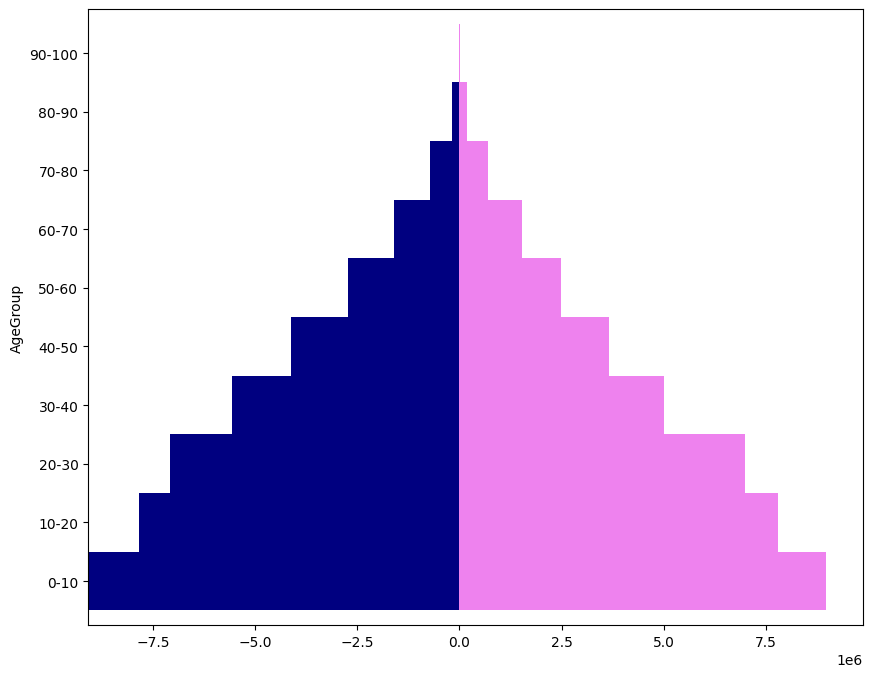

In [76]:
# Pivot the data to get 'AgeGroup' as index, 'Year' and 'Sex' as columns, and 'People' as values
pivot_df = grouped_df.pivot_table('People', ['AgeGroup'], ['Year', 'Sex'])
# Plotting the population pyramid
fig, ax = plt.subplots(figsize=(10, 8))

# Because we're plotting negative values for male, we'll need to take the absolute value for plotting purposes
pivot_df[1900, 1].plot(kind='barh', ax=ax, color='navy', width=1, label='Male 1900', left=pivot_df[1900, 1]*-1)
pivot_df[1900, 2].plot(kind='barh', ax=ax, color='violet', width=1, label='Female 2000')



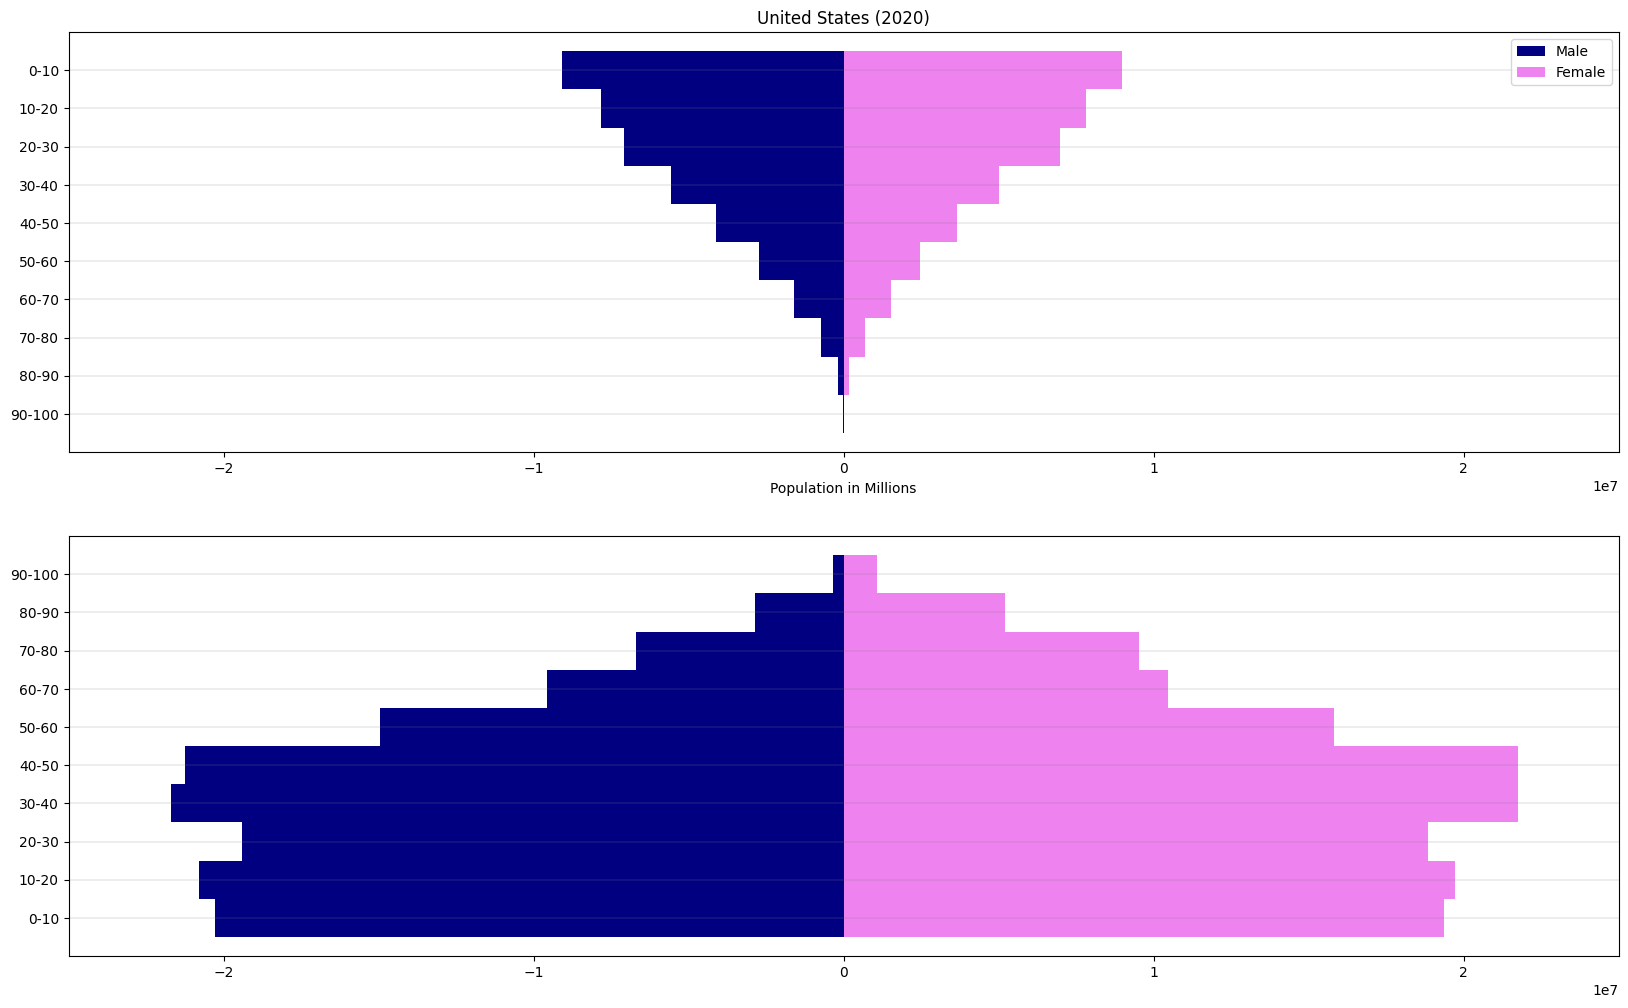

In [117]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
bar_thickness = 1

male_data = grouped_df[grouped_df['Sex']==1]
male_data.loc[:, 'People'] = -male_data.loc[:, 'People'] 
female_data = grouped_df[grouped_df['Sex']==2]

# Plot males
ax[0].barh(male_data[male_data['Year']==1900]['AgeGroup'], male_data[male_data['Year']==1900]['People'], height=bar_thickness, color='navy', label='Male')
# Plot females
ax[0].barh(female_data[female_data['Year']==1900]['AgeGroup'], female_data[female_data['Year']==1900]['People'], height=bar_thickness, color='violet', label='Female')

# Plot males
ax[1].barh(male_data[male_data['Year']==2000]['AgeGroup'], male_data[male_data['Year']==2000]['People'], height=bar_thickness, color='navy', label='Male')
# Plot females
ax[1].barh(female_data[female_data['Year']==2000]['AgeGroup'], female_data[female_data['Year']==2000]['People'], height=bar_thickness, color='violet', label='Female')

# Add labels and title
ax[0].set_xlabel('Population in Millions')
ax[0].set_title('United States (2020)')

# Add grid
ax[0].grid(False)
ax[0].invert_yaxis()

# Add grid
ax[1].grid(False)

# Add legend
ax[0].legend()

ax[0].set_xlim(-25 * 10**6, 25 * 10**6)
ax[1].set_xlim(-25 * 10**6, 25 * 10**6)

# Set the y-tick positions to the start and end of each bar
# We calculate the position by taking the index and adding/subtracting half the thickness of the bar
y_tick_positions = [(i + bar_thickness / 2) for i in range(len(labels))] + \
                   [(i - bar_thickness / 2) for i in range(len(labels))]


# a is an axes object, e.g. from figure.get_axes()

# Hide major tick labels
# ax[0].xaxis.set_major_formatter(ticker.NullFormatter())
# 
# # Customize minor tick labels
# ax[0].xaxis.set_minor_locator(ticker.FixedLocator([1.5,2.5,3.5,4.5,5.5]))
# ax[0].xaxis.set_minor_formatter(ticker.FixedFormatter(['1','2','3','4','5']))

# Set the y-tick labels to be the age groups, positioned in the center of the bars
# y_tick_labels = labels * 2  # Duplicate labels for start and end positions
# y_tick_labels.sort()  # Sort the labels to match the tick positions

# # Apply the positions and labels to the y-axis
# ax[0].set_yticks(y_tick_positions)
# ax[0].set_yticklabels(y_tick_labels)
# 
# # Repeat for the second subplot if necessary
# ax[1].set_yticks(y_tick_positions)
# ax[1].set_yticklabels(y_tick_labels)

# Enable the horizontal grid lines and set the style
ax[0].yaxis.grid(True, linestyle='-', linewidth=0.2, color='gray')
ax[1].yaxis.grid(True, linestyle='-', linewidth=0.2, color='gray')

# ... [previous code] ...

# # Calculate the midpoints for y-tick positions
# midpoints = [(start + end) / 2 for start, end in zip(y_tick_positions[:len(labels)], y_tick_positions[len(labels):])]
# 
# # Apply the midpoints as y-tick positions and labels to the y-axis
# ax[0].set_yticks(midpoints)
# ax[0].set_yticklabels(labels)
# 
# # Repeat for the second subplot if necessary
# ax[1].set_yticks(midpoints)
# ax[1].set_yticklabels(labels)
# 
# # Enable the horizontal grid lines and set the style
# ax[0].yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major', alpha=0.7)
# ax[1].yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major', alpha=0.7)

# ... [rest of the code] ...


# Save plot
fig.savefig('./census.svg')

# Show the plot
plt.show()